# 1. Análise Exploratória dos Dados

a. Carregar a base de dados

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\est.kaue.evaristo\Desktop\pos graduassao\precos_carros_brasil.csv", delimiter=",", low_memory=False)
df.head(n=3)

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0


b. Verificar valores faltantes

In [2]:
print("Valores faltantes por coluna:")
print(df[df.isna().any(axis=1)])

Valores faltantes por coluna:
        year_of_reference month_of_reference fipe_code authentication brand  \
202297                NaN                NaN       NaN            NaN   NaN   
202298                NaN                NaN       NaN            NaN   NaN   
202299                NaN                NaN       NaN            NaN   NaN   
202300                NaN                NaN       NaN            NaN   NaN   
202301                NaN                NaN       NaN            NaN   NaN   
...                   ...                ...       ...            ...   ...   
267537                NaN                NaN       NaN            NaN   NaN   
267538                NaN                NaN       NaN            NaN   NaN   
267539                NaN                NaN       NaN            NaN   NaN   
267540                NaN                NaN       NaN            NaN   NaN   
267541                NaN                NaN       NaN            NaN   NaN   

       model fuel gea

In [3]:
print("Removendo valores NA.")
df = df.dropna()

Removendo valores NA.


In [4]:
print("Verificando novamente valores NA.")
print(df[df.isna().any(axis=1)])

Verificando novamente valores NA.
Empty DataFrame
Columns: [year_of_reference, month_of_reference, fipe_code, authentication, brand, model, fuel, gear, engine_size, year_model, avg_price_brl]
Index: []



c. Verificar dados duplicados

In [5]:
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

Número de linhas duplicadas: 2


In [6]:
# Removendo linhas duplicadas
df = df.drop_duplicates()

In [7]:
print(f"Verificando novamente o número de linhas duplicadas: {df.duplicated().sum()}")

Verificando novamente o número de linhas duplicadas: 0


   d. Categorizar colunas numéricas e categóricas

Transformações necessárias para a sequência do trabalho

In [8]:
# Considerando que a base de dados é de 2021, vamos manter apenas os veículos com ano de fabricação menor ou igual a 2021

# Aqui é possível verificar modelos de 2022 e 2023
df["year_model"].unique()

# Aqui fazemos a remoção desses modelos
df = df[df["year_model"] <= 2021]

In [9]:
# Casting das colunas de ano, mudando de float para int
df["year_of_reference"] = df["year_of_reference"].astype(int)
df["year_model"] = df["year_model"].astype(int)

# Casting da coluna engine_size para float
df["engine_size"] = df["engine_size"].str.replace(",", ".").astype(float)

# Criando uma coluna que indica a idade dos carros, levando em consideração o ano de referência
# Nesta transformação, vamos considerar o ano da base de dados como o ano corrente para os calculos seguintes e também vamos somar 1 para garantir que nenhum veículo tenha 0 anos de idade
df["age_years"] = (df["year_model"].max() - df["year_model"])

Separando as colunas em numéricas e categóricas e imprimindo um resumo estatístico:

In [10]:
# Colunas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Resumo das variáveis numéricas:")
print(df[num_cols].describe())

Resumo das variáveis numéricas:
       year_of_reference    engine_size     year_model  avg_price_brl  \
count      192009.000000  192009.000000  192009.000000  192009.000000   
mean         2021.558885       1.831813    2010.677718   48415.534480   
std             0.571337       0.734854       5.990630   46179.576685   
min          2021.000000       1.000000    2000.000000    6647.000000   
25%          2021.000000       1.400000    2006.000000   22150.000000   
50%          2022.000000       1.600000    2011.000000   36213.000000   
75%          2022.000000       2.000000    2016.000000   58609.000000   
max          2023.000000       6.200000    2021.000000  979358.000000   

           age_years  
count  192009.000000  
mean       10.322282  
std         5.990630  
min         0.000000  
25%         5.000000  
50%        10.000000  
75%        15.000000  
max        21.000000  


e. Contagem de valores por modelo e marca

In [11]:
# Colunas categóricas (exemplo com 'brand' e 'model')
cat_cols = df.select_dtypes(include=["object"]).columns
print("\nResumo das variáveis categóricas (exemplo com 'brand' e 'model'):")
print(df["brand"].value_counts().head())
print(df["model"].value_counts().head())


Resumo das variáveis categóricas (exemplo com 'brand' e 'model'):
brand
Fiat               43012
VW - VolksWagen    42480
GM - Chevrolet     36039
Ford               32156
Renault            27160
Name: count, dtype: int64
model
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
Name: count, dtype: int64


f. Explicação breve dos resultados

A base de 192.009 carros de 2021 possuia 2 linhas duplicadas e 65.245 de valores faltantes, todos removidos. Marcas populares como Fiat, Volkswagen e Chevrolet dominam, com seus veículos semi-novos com um valor médio de 48.415 reais. A idade média é 10 anos, indicando uma frota antiga, com motores centrados em 1800 cilindradas.

# 2. Visualização dos Dados

a. Distribuição da quantidade de carros por marca

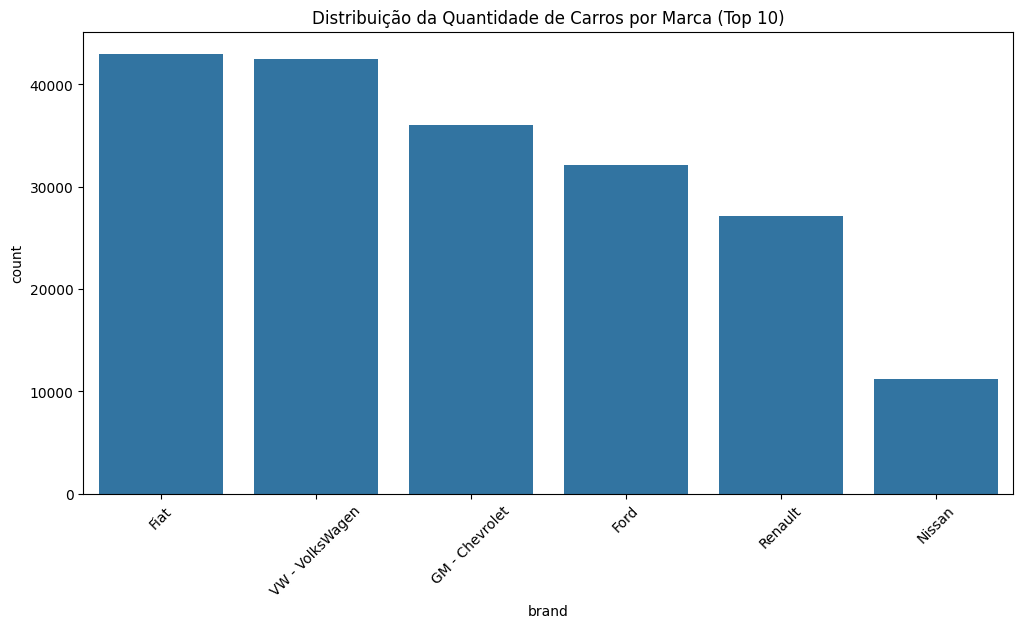

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(
    x="brand", data=df, order=df["brand"].value_counts().index[:10]
)  # Top 10 marcas
plt.xticks(rotation=45)
plt.title("Distribuição da Quantidade de Carros por Marca (Top 10)")
plt.show()

b. Distribuição da quantidade de carros por tipo de caixa (automático ou manual)

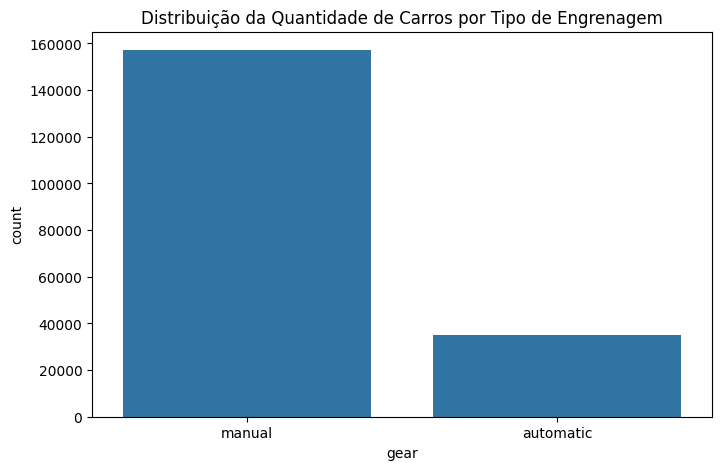

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x="gear", data=df)
plt.title("Distribuição da Quantidade de Carros por Tipo de Engrenagem")
plt.show()

c. Evolução da média de preço dos carros ao longo dos meses de 2022

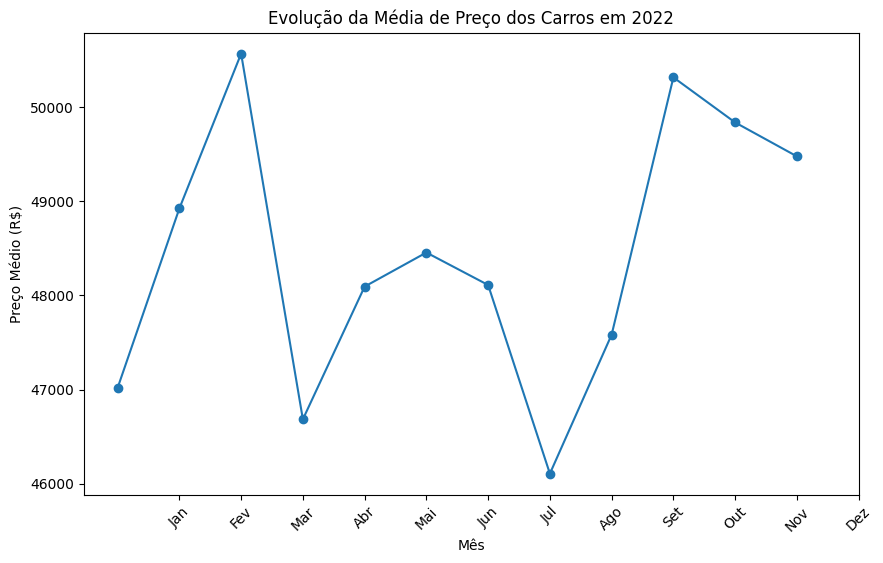

In [14]:
media_preco_mes = df.groupby("month_of_reference")["avg_price_brl"].mean()
plt.figure(figsize=(10, 6))
media_preco_mes.plot(kind="line", marker="o")
plt.title("Evolução da Média de Preço dos Carros em 2022")
plt.xlabel("Mês")
plt.ylabel("Preço Médio (R$)")
plt.xticks(
    ticks=list(range(1, 13)),
    labels=[
        "Jan",
        "Fev",
        "Mar",
        "Abr",
        "Mai",
        "Jun",
        "Jul",
        "Ago",
        "Set",
        "Out",
        "Nov",
        "Dez",
    ],
    rotation=45,
)
plt.show()

d. Distribuição da média de preço por marca e tipo de engrenagem

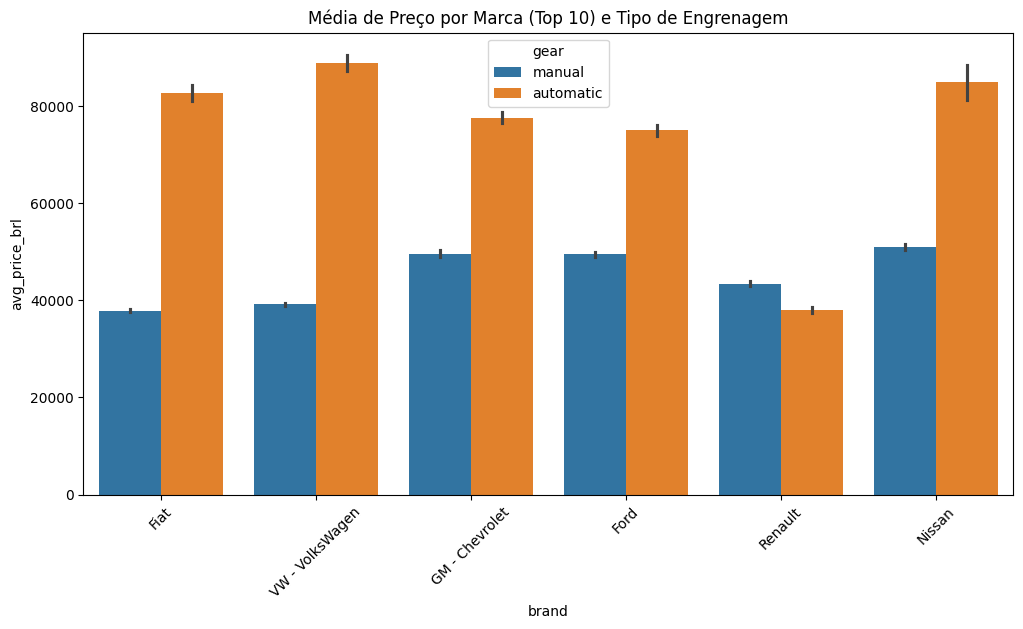

In [15]:
plt.figure(figsize=(12, 6))

sns.barplot(
    x="brand",
    y="avg_price_brl",
    hue="gear",
    data=df,
    order=df["brand"].value_counts().index[:10],
)

plt.xticks(rotation=45)
plt.title("Média de Preço por Marca (Top 10) e Tipo de Engrenagem")
plt.show()

e. Explicação breve dos resultados do item d

Marcas como Fiat e Volkswagen têm preços médios mais altos com câmbio automático, enquanto a Renault se mostra uma opção mais em conta, tanto em seus veículos de câmbio manual, quanto de câmbio automático. A maioria das marcas populares oferece ambos os tipos, mas automáticos elevam os preços. A variação reflete preferências de mercado e categorias de veículos.

f. Distribuição da média de preço por marca e tipo de combustível

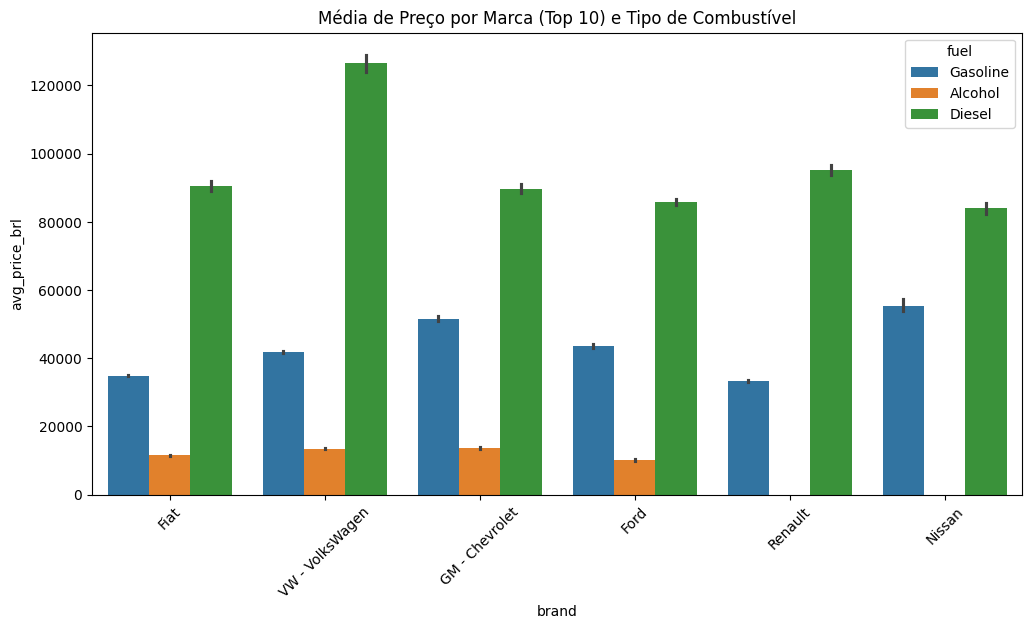

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="brand",
    y="avg_price_brl",
    hue="fuel",
    data=df,
    order=df["brand"].value_counts().index[:10],
)
plt.xticks(rotation=45)
plt.title("Média de Preço por Marca (Top 10) e Tipo de Combustível")
plt.show()

g. Explicação breve dos resultados do item f

A média de preço em todas as marcas evidencia que os veículos a diesel são, sempre, a opção mais cara. Os veículos a gasolina mostram uma média de preço parecida em todas as marcas e os de alcool são as opções mais em conta, nas marcas Fiat, Volkswagen, Chevrolet e Ford.

Uma curiosidade é que a base de dados, depois de tratada, não possui opções a alcool para as marcas Renault e Nissan.

# 3. Aplicação de Modelos de Machine Learning

a. Escolher variáveis independentes e target

In [17]:
features = ["brand", "fuel", "gear", "engine_size", "year_model", "age_years"]
target = "avg_price_brl"
X = df[features]
X = pd.get_dummies(X, columns=["brand", "fuel", "gear"], drop_first=True)
y = df[target]

b. Criar partições de treino e teste

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

c. Treinar modelos RandomForest e XGBoost

In [19]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

xgb = XGBRegressor(random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

d. Gravar valores preditos

In [20]:
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

e. Análise de importância das variáveis

In [21]:
importances_rf = rf.feature_importances_
importances_xgb = xgb.feature_importances_

imp_df_rf = pd.DataFrame(
    {"feature": X.columns, "importance": importances_rf}
).sort_values("importance", ascending=False)
imp_df_xgb = pd.DataFrame(
    {"feature": X.columns, "importance": importances_xgb}
).sort_values("importance", ascending=False)

print("Importância das variáveis - RandomForest:")
print(imp_df_rf.head())
print("\nImportância das variáveis - XGBoost:")
print(imp_df_xgb.head())

Importância das variáveis - RandomForest:
        feature  importance
0   engine_size    0.475753
2     age_years    0.186110
1    year_model    0.156527
8   fuel_Diesel    0.086289
10  gear_manual    0.036106

Importância das variáveis - XGBoost:
                  feature  importance
8             fuel_Diesel    0.421540
0             engine_size    0.293352
1              year_model    0.142908
7   brand_VW - VolksWagen    0.059972
10            gear_manual    0.042469


f. Explicação breve dos resultados

Podemos observar no modelo RandomForest os valores das importância das variáveis são mais altos do que análise XGBoost. Também teve uma mudança de variável, a RandomForest escolheu "age_years" e XGBoost selecionou brand_VW - Volkswagen. E umas das importâncias das variáveis mais característica é em relação a ambos modelos treinados, é a feature fuel_Diesel, tendo uma diferença de 0,335251.

g. Escolher o melhor modelo com base em MSE, MAE e R²

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"RandomForest - MSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")
print(f"XGBoost - MSE: {mse_xgb:.2f}, MAE: {mae_xgb:.2f}, R²: {r2_xgb:.2f}")

RandomForest - MSE: 122623655.44, MAE: 6113.22, R²: 0.94
XGBoost - MSE: 123143136.11, MAE: 6151.06, R²: 0.94


h. Explicação breve sobre o melhor modelo

Podemos observar que resultados são bem próximos ou idênticos em ambos modelos, com exceção do MSE que resulta em 519.480,67 sendo o maior valor distinto entre os modelos RandomForest e XGBoost, R² nos dois são 0,94 e no MAE tem uma diferença de 37,84. 